In [77]:
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D,MaxPooling2D
from tensorflow.keras import Model
import tensorflow.keras.layers as layers
from matplotlib import pyplot as plt
from matplotlib import gridspec
import numpy as np

In [78]:
# Load CIFAR10 images

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# Normalize pixel values into 0~1.
train_images, test_images = train_images / 255.0, test_images / 255.0

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [79]:
# Train and test images have shape of (# of data, image height, image width, channel)
# For CIFAR10 data, channel=3. 

print(f"Train images have shape of {train_images.shape} and train lables have shape of {train_labels.shape}")
print(f"Test images have shape of {test_images.shape} and test lables have shape of {test_labels.shape}")


Train images have shape of (50000, 32, 32, 3) and train lables have shape of (50000, 1)
Test images have shape of (10000, 32, 32, 3) and test lables have shape of (10000, 1)


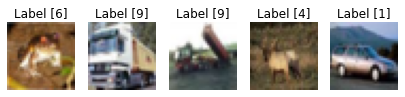

In [80]:
# Example plots of data 
gs = gridspec.GridSpec(1,5)
plt.figure(figsize=[7,2])
for i in range(5):
  plt.subplot(gs[i])
  plt.imshow(train_images[i].squeeze())
  plt.title("Label {}".format(train_labels[i]))
  plt.axis('off')

plt.show()

In [81]:
# tf.data.Dataset.from_tensor_slices makes a dataset into batches.
# You can randomly shuffle the dataset, to reduce possible biases. 

train_ds = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)


In [82]:
# Check the size of a batch 

for ii in train_ds:
  print(f"A batch of train_images has shape of {ii[0].shape}, and train_labels has shape of {ii[1].shape}")
  break

A batch of train_images has shape of (32, 32, 32, 3), and train_labels has shape of (32, 1)


# Problem 1. Build a fully connected neural network.

In [85]:
"""
Build a fully connected neural network using Keras Model class.
For a fully connected neural network, you can use Dense layers. (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
For the last layer, you need to have a 10 dimensional layer where each node corresponds to a class (plane, car, bird, ...).

Note that the input dimension will be automatically determined on demand.
You may want to use Flatten() to flatten the 3D image.

Example usage: 
  class FCNN(Model):
      def __init__(self):
        super(FCNN, self).__init__()
        
        self.d1 = Dense(16, activation='relu')
        self.d2 = Dense(2, activation='softmax')

      def call(self, x):
        x = self.d1(x)
        return self.d2(x)

"""

class FCNN(Model):
  def __init__(self, hidden=128, layer=3, per_layer=None):
    super(FCNN, self).__init__()
    self.layer = layer
    self.fc_layers = []
    #####################################
    # Write your code here
    #####################################
    #self.model = tf.keras.Sequential()
    self.flatten = (tf.keras.layers.Flatten())
    self.b1_1 = (tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu, name=f"layer1"))
    self.b1_2 = (tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu, name=f"layer2"))

    self.b2_1 = (tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu, name=f"layer3"))
    self.b2_2 = (tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu, name=f"layer4"))

    self.b3_1 = (tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu, name=f"layer5"))
    self.b3_2 = (tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu, name=f"layer6"))
    self.b3_3 = (tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu, name=f"layer7"))


    self.out = (tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    #####################################

  def call(self, x):
    ##################################### 
    # Write your code here
    # This function returns the probability of each class

    return self.out((((self.b3_3(self.b3_2(self.b3_1((self.b2_2(self.b2_1((self.b1_2(self.b1_1(self.flatten(x))))))))))))))


# Problem 2. Build a convolutional neural network.

In [86]:
"""
Build a convolutional neural network using Keras Model class.
This time you will use Conv2D layers. (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
For the last layer, you need to have a 10 dimensional layer where each node corresponds to a class (plane, car, bird, ...).

Note that the input dimension will be automatically determined on demand.
You may want to use Flatten() to flatten the 3D features to apply to a dense layer.

Example usage: 
class CNN(Model):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = Conv2D(filters=3, kernel_size=10, strides=(1, 1), activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(64, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

"""


class CNN(Model):
  def __init__(self):
    super(CNN, self).__init__()
    #####################################
    # Write your code here
    #####################################
    #self.model = tf.keras.Sequential()
    # Block 1
    self.b1_1 = (layers.Conv2D(
        32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block1_conv1'))
    self.b1_2 = (layers.Conv2D(
        32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block1_conv2'))
    self.b1_3 = (layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    self.b2_1 = (layers.Conv2D(
        64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block2_conv1'))
    self.b2_2 = (layers.Conv2D(
        64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block2_conv2'))
    self.b2_3 = (layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    self.b3_1 = (layers.Conv2D(
        128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block3_conv1'))
    self.b3_2 = (layers.Conv2D(
        128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block3_conv2'))
    self.b3_3 = (layers.Conv2D(
        128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block3_conv3'))
    self.b3_4 = (layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    self.flatten = (Flatten())
    self.fcl = (tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1(0.01),
                              activity_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu, name="dense"))
    self.out = (tf.keras.layers.Dense(10, activation=tf.nn.softmax, name="output"))

  def call(self, x):
    ##################################### 
    # Write your code here
    # This function returns the probability of each class

    return self.out(self.fcl(self.flatten(self.b3_4(self.b3_3(self.b3_2(self.b3_1(self.b2_3(self.b2_2(self.b2_1(self.b1_3(self.b1_2(self.b1_1(x)))))))))))))
    ####################################z



# Problem 3. Experiments

In [87]:
tf.keras.backend.clear_session()
""" 
Try to modify below with various settings for training.

Settings:
  model: FCNN() or CNN() that you implemented above.
  loss_object: SparseCategoricalCrossentropy, MeanSquaredError, CategoricalHinge, ect. You can find various loss functions here 
               (https://www.tensorflow.org/api_docs/python/tf/keras/losses). 
  optimizer: Adam(), Adagrad(), ect. You can find various optimizers here 
            (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).
             Check the hyperparameters for each optimizer and see how it affects the training.
"""
##################################### 
# Write your code here

print(train_images.shape)
model = FCNN()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss=loss_object, metrics=['mae', 'accuracy'])



#####################################

train_loss = tf.keras.metrics.Mean()
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

test_loss = tf.keras.metrics.Mean()
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

(50000, 32, 32, 3)


In [88]:
# You can also check the size of the model
model.build(input_shape=(32,32,32,3))
model.summary()

Model: "fcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
layer1 (Dense)               multiple                  98336     
_________________________________________________________________
layer2 (Dense)               multiple                  1056      
_________________________________________________________________
layer3 (Dense)               multiple                  2112      
_________________________________________________________________
layer4 (Dense)               multiple                  4160      
_________________________________________________________________
layer5 (Dense)               multiple                  8320      
_________________________________________________________________
layer6 (Dense)               multiple                  16512  

In [90]:

# You may not need to modify this cell.

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
EPOCHS = 50
summary = {'train_loss':[], 'train_accuracy':[], 'test_loss':[], 'test_accuracy':[]}
for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for images, labels in test_ds:
    test_step(images, labels)

  
  template = 'epoch: {}, train loss: {}, train accuracy: {}, test loss: {}, test accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))
  summary['train_loss'].append(train_loss.result())  
  summary['train_accuracy'].append(train_accuracy.result()*100)  
  summary['test_loss'].append(test_loss.result())  
  summary['test_accuracy'].append(test_accuracy.result()*100)  


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch: 1, train loss: 1.9201469421386719, train accuracy: 29.173999786376953, test loss: 1.8315712213516235, test accuracy: 33.09000015258789
epoch: 2, train loss: 1.8518366813659668, train accuracy: 32.13399887084961, test loss: 1.7825847864151, test accuracy: 35.11000061035156
epoch: 3, train loss: 1.8113884925842285, train accuracy: 33.7599983215332, test loss: 1.7529685497283936, test accuracy: 36.37999725341797
epoch: 4, train loss: 1.7828190326690674, train accuracy: 34.88050079345703, test loss: 

In [ ]:
def plot_summary(summary):
  plt.plot(summary['train_accuracy'],  'o-', color='C0', label='train')
  plt.plot(summary['test_accuracy'], 'o-', color='C1',  label='test')  
  plt.grid()
  plt.title('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(summary['train_loss'],  'o-', color='C0', label='train')
  plt.plot(summary['test_loss'], 'o-', color='C1',  label='test')  
  plt.grid()
  plt.title('Loss')
  plt.legend()
  plt.show()

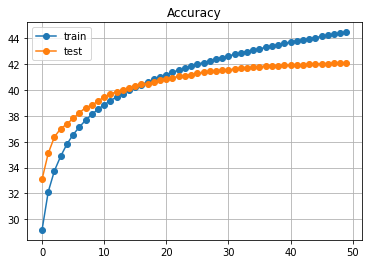

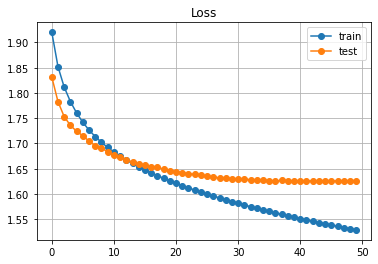

In [ ]:
# Plot the accuracies and losses during the training.

plot_summary(summary)

# Test the trained model!

In [92]:
predictions = []
for images, labels in test_ds:
  predictions.append(model(images))

predictions = np.vstack(predictions)

target_label_index = []
accs = []
for i in range(10):
  target_index = np.where(test_labels==i)[0]
  target_label_index.append(target_index)

  acc = (predictions.argmax(axis=-1)[target_label_index[i]]==i).sum()
  accs.append(acc)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



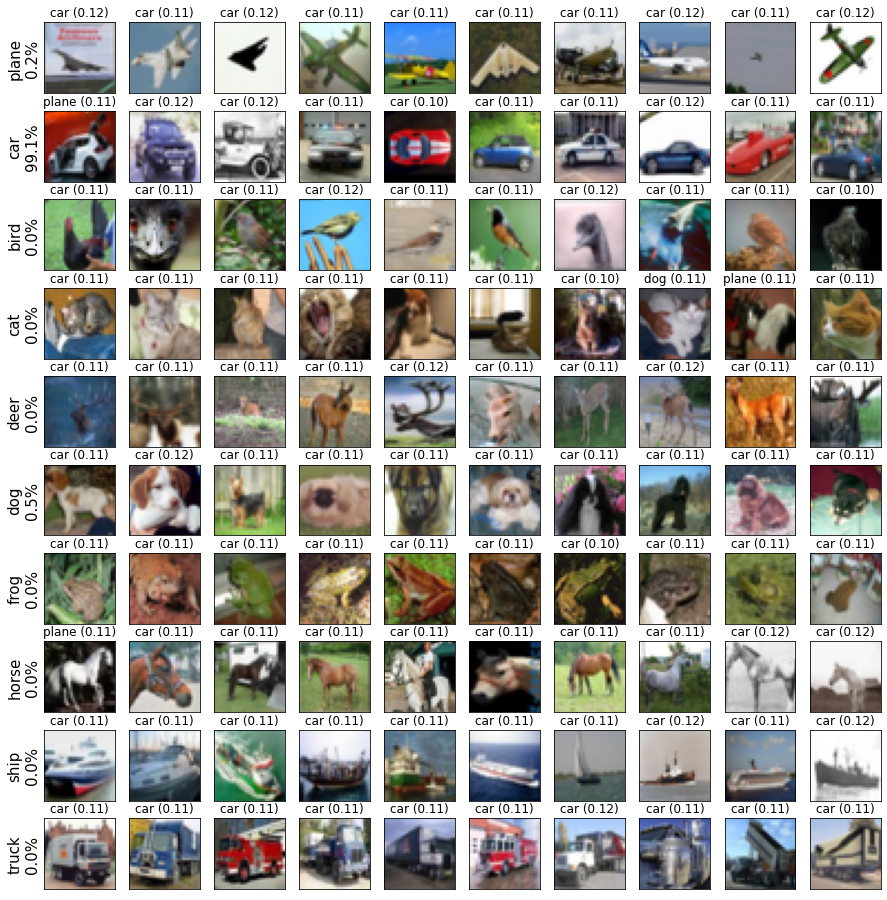

In [115]:
# Print the results from the trained model.

N = 10
index_type = 'order'

gs = gridspec.GridSpec(10,N)
plt.figure(figsize=[int(N*1.5),15+1])
for i in range(10):
  if index_type == 'order':
    target_index = target_label_index[i][:N] # in order
  elif index_type == 'random':
    target_index = target_label_index[i][np.random.randint(1000,size=N)] # in random

  test_img = test_images[target_index]
  pred = predictions[target_index].argmax(axis=-1)
  prob = predictions[target_index][np.arange(N), pred]
  for j in range(N):
    if j == 1:
      plt.ylabel("{}\n{}%".format(classes[i], accs[i]/10), fontsize=15)
    plt.subplot(gs[i,j])
    plt.imshow(test_img[j].squeeze())
    plt.title("{} ({:.2f})".format(classes[pred[j]], prob[j]))
    plt.xticks([])
    plt.yticks([])
plt.show()